
# Convolutional Neural Network - Hyperparameter tuning Notebook

To begin this notebook we will first try to understand what is a Convolutional Neural Network and understand some of its main components ie: Layers which makes this Neural Network different from a normal Artificial Neural Network(ANN).

## Convolutional Neural Networks
CNNs as they are popularly known are the algorithms which are mostly used in the field of Image Processing and computer vision. They are not different from the normal Artificial Neural Networks and are made up of similar structure of neurons with weights associated with it but have some different layers in it which help us process images effectively and can be used in many other fields like self-driving cars, photo tagging, gesture reognition etc.

CNNs work by consecutively detecting **features** using the different **filters**, which form different layers and are eventually combined to process the image as a whole. These filters work on different aspects of the image - like edge detection, corner detection, embossing etc. All these filters are expressed in a form of a **N x N matrix**. So all of these layers we get from the dot product multiplication of filters and the pixel values in the Images are then combined and fed to the next layer for learning and classifying the image accordingly. 

CNNs always deal with the **height, width and depth** of the image. Depth is **3** if the image is coloured indicating the Red, Blue, Green colours and is **1** if the image is black and white.

We will understand this process in detail in the coming section.

If you want to understand the Math behind the process it is very well explained in this paper with some other important concepts as well: https://cs.nju.edu.cn/wujx/paper/CNN.pdf

As we now have an overview of what is a Convolutional Neural Network lets understand the different layers and their working.

CNNs are made up of 3 layers:
1) Convolutional layers
2) Pooling Layers
3) Fully-connected layers

# Convolutional Layer
Convolutional layers is the layer which forms the core of the CNNs and is where all the heavy computation ( Maths - dot product multiplication) takes place.

CONV layer is made up of different filters which are then combined to a form a layer. Every filter in this layer is a **N x N** matrix which defines the height and width of the filter.It is nothing but a set of weights. This filter is taken and is slided over the entire image from top left corner to the bottom right corner once. During this process the values in the filter are multiplied to the values of pixels in the image corresponsing to their position. This gives us an layer called **Activation Map**. There are many such filters which are slided over the image once with different values working on different aspects of the image. They all produce an Activation map and a collection of this Activation Map forms our Convolutional Layer.


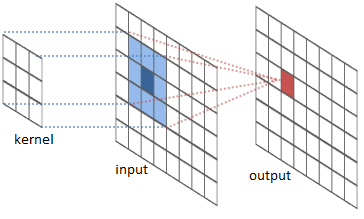

In [17]:
from IPython.display import Image
Image(filename='C:/Users/SAHIL/Desktop/cnn_layer.png')

In this image above we can see that we had an Image of 28x28x3 pixel (input) over which we used a 3x3 filters(kernel) which gave us layers of Activation Maps (output) which form our Convolutional Layer. We notice here that the image size of our activation maps are reduced. 

The most used activation function in this layer is the **"relu"** - Rectified Linear Unit. This helps us to preserve the non-linearity in the process.

To keep the size of the Activation Maps in accordance of our Input Image we make use of a concept called **Zero-Padding**. Here we just add zero pixel to the border of the image. This results in the Activation maps keeping the same input Image size. 

# Pooling Layer
Pooling layers function is to reduce the spatial size of the CONV layer thereby reducing the computation time. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially, using the MAX operation. The most common form is a pooling layer with filters of size 2x2 applied with a **stride** of 2. This actually removes 75% of the values from our CONV layer.
So why do we do it?
Pooling Layer helps us to maintain the Spatial Invariance in the image. In simple terms it helps us to know the feature in the image regardless of its position and angle. Pooling helps us to preserve the invariance that we could infer in the future images. It also helps us in reducing the size of our image preserving the Important Features. We also reduce the number of parameters. 

There are many types of Pooling - Average, Max etc. But the most preferred one is the MaxPooling with of (2 x 2) with a stride of 2. 

For better understanding of the Pooling operations please refer to this paper: http://ais.uni-bonn.de/papers/icann2010_maxpool.pdf

# Fully Connected Layer
The fully connected layer is nothing but a normal layer with neurons which we have been using in Artificial Neural networks. 

After we complete our pooling process we add a **Flatten()** function to the pooling layer which converts the pooling layer to a vector of numbers which is the input value which we expect in a normal Neural Network. Here each pixel from the pooling layer forms a separate Neuron and is connected to all the other neurons in different layers unlike the ANNs, hence the name Fully COnnected Layer.

The main purpose of this layer is to combine our features into attributes which help us predict the final class even better. So it actually helps us to know the best features that we have in form of neurons and tells the class which are the most important feature for the respective class. The last fully connected layer contains the as many neurons as the number of classes to be predicted.

Eg: So if we want to predict two classes Cats-Dogs, our last Fully connected layer will contain 2 Neurons which are connected to every Neuron in the layer before. The Network here will help those last two Neurons (CATS and Dogs) to know which of the other Neurons in the previous layer best define the features of a Dog or a Cat. And is the value of that Neuron for a particular image is high the Cat-Neuron will know that there is a high chance of this image being a Cat. 

The Activation function we normally use in the output layer is the **Softmax** activation function. This helps us to balance our prediction percentage for the different classes.

**To get an indepth detail of the entire working it is highly recommended to read the course notes of Andrej Karpathy : http://cs231n.github.io/convolutional-networks/** 


# Working on MNIST dataset using Keras

As we now have a brief idea about the how a CNN works and what are the layers involved in it we would now see a complete implementation of a problem where we need to recognize the hand written digits in a dataset. As we want to save some computation time we would only consider two digits - **2** and **7** and build a model to recognize these hand written digits.

As we build the model we would be covering the most important part understanding the parameters involved in the layers and also tuning them to an extent to improve our accuracy


In [1]:
# Importing all the required packages from Keras for our problem
from __future__ import print_function
import keras
from keras.datasets import mnist    #the hand written digit dataset
from keras.models import Sequential  # used to initialize our network as a sequence of layers
from keras.layers import Dense, Dropout, Flatten #required layers for CNNs
from keras.layers import Conv2D, MaxPooling2D # required layers for CNNs
from keras import backend as K
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28


In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


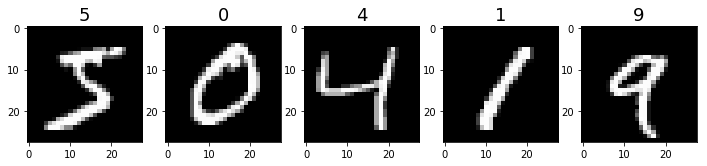

In [4]:
# We will now define a function to see some of our images in the dataset
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)


def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')
    
plt.gray()
plt.close()
    
plots(x_train[:5], titles = y_train[:5])   

In [5]:
#Only look at 2s and 7s
train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)

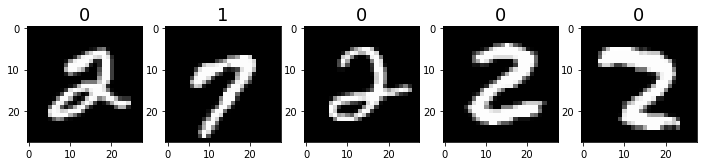

In [6]:
# Now let's again plot the training set and see if there are only 2s and 7s in it

plots(x_train[:5], titles = y_train[0:5])

As we can see that our new training datset has only two digits **2** and **7** and have been assigned two classes 0 and 1 to the digits respectively.

In the code below as we are using a Keras backend as **K**. We need to be sure of the usage of the input_shape of the image ie: **Height, Widht and Depth**. So we will be using an **if** statement which would take in both the cases where we can define the **Depth** first before Height and Width **or** after them.

We need to do this because as Keras works on either TensorFlow or Theano, their syntax of taking the input_shape is different.

To learn more about this please have a look at the Keras documentation.


In [7]:
if K.image_data_format() == 'channels_first': # Here we use the channels_first where depth defined before Height and Width
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # If channel_last the depth is defined after Height and Width
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [9]:

# convert class vectors to binary class matrices

num_classes = 2 # as we have only two digits

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


As we have now finished all our necessary steps required to build our model in the form of input data, we will now move forward and start building our model. We will first use some normal parameters which are expected in a layer and see what is the accuracy that we get and after that we will go in detail about the hyperparameters inside each layer, understand them and try to fine tune our model using GridSearch to some extent.

Lets run a Basic Model with some default values in the layer


In [11]:
batch_size = 128
epochs = 12

model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 12223 samples, validate on 2060 samples
Epoch 1/12
12223/12223 [==============================] - 25s - loss: 0.2821 - acc: 0.8898 - val_loss: 0.0961 - val_acc: 0.9655
Epoch 2/12
12223/12223 [==============================] - 19s - loss: 0.1081 - acc: 0.9683 - val_loss: 0.0759 - val_acc: 0.9728
Epoch 3/12
12223/12223 [==============================] - 20s - loss: 0.0886 - acc: 0.9755 - val_loss: 0.0701 - val_acc: 0.9777
Epoch 4/12
12223/12223 [==============================] - 22s - loss: 0.0782 - acc: 0.9796 - val_loss: 0.0690 - val_acc: 0.9752
Epoch 5/12
12223/12223 [==============================] - 22s - loss: 0.0742 - acc: 0.9805 - val_loss: 0.0630 - val_acc: 0.9782
Epoch 6/12
12223/12223 [==============================] - 22s - loss: 0.0728 - acc: 0.9825 - val_loss: 0.0612 - val_acc: 0.9782
Epoch 7/12
12223/12223 [==============================] - 22s - loss: 0.0697 - acc: 0.9817 - val_loss: 0.0571 - val_acc: 0.9820
Epoch 8/12
12223/12223 [==============================]

As we have achieved a very good validation score using some default values we will now understand some hyperparamters involved in these models and try and tune them to achieve better accuracy.

# Understanding the Hyperparameters
As we have seen a model which gives us a very nice score on some really default parameters we will now try and understand some of the important parameters which can help us improve the validation accuracy of our model to some extent

## Filter Size
This is a parameter that we use in the Convolutional layer and forms the base of our model. A filter is nothing but a set of weights that we express in the form of a **N x N** matrix. So choosing the sie of this matrix is one important task and can surely affect the model performance.

Having small filters helps us in preserving the spatial resolution of our image, we should always consider filters according to the size of the given image, the starting size for most cases of small images is ( **3 x 3 or 5 x 5** ). For images which are bigger in size we can start with ** 7 x 7**. In our case as the input image size is 28 x 28 we will use our small filters for the Convolutional layer.

## Stride
Stride is a parameter which defines the slide of the filter. It is the value with which the filter slides ahead after performing the (dot)multiple operation with the pixel values of the image. We use the value **Stride = 1** for most cases. It is normally set in a way that the putput volume we get is an integer and not a fraction. Increasing the stride reduces the spatial dimensions of the image

## Weight Initializers
This parameter is one of the most important parameter in Neural Networks and affects the accuracy of the model to a great extent. Weights in the Convolutional layers are nothing but the values which we will be using in the filter/kernel that will be multiplied with the pixel values of the image. It is a very important parameter as its not only present in the Convolutional layer but is also associated with the weights in the Fully-Connected layer.

The kernel_initializer that we have used in our case is the "Xavier Initialization" as it goes very well with the activation function "relu" - Rectifiede Linear Unit. It is highly suggested to use both of them together.

we can also define our own weight initializer function.

To know more about the "Xavier Initialization" read this blog: http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization

Original paper: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf


## Activation function
Activation function is nothing but a function which takes in the multiplication of weights - a number as a input and performs mathematical operations on it according to the fucntion selected and gives us the output. It helps us to estimate complex non-linear relationships in data. There are many activation functions present like the **Sigmoid, tanh, ReLU, LeakyReLU** but we should always select the ones which suit our layers.

As presented in many articles and papers the best suited activation function for CNNs is **reLU** as it it helps the SGD converge a lot quicker compared to sigmoid/tanh, that's why we have selected it as our activation function on all layers except for the last one. 

ReLU = f(x) = max(0, x) - which means it is simple a threshold at 0

In the last layer it is always recommended to use the Softmax. It is an exponential function, with results normalized so that the sum of activations across the layer is 1.0, so that the outputs can be interpreted as probabilities of class.

## Optimizers and Learning rate
As Neural Networks use Gradient Descent for optimizing the performance of our model. There are many algorithms which help us to optimize the Gradient Descent and achieve a robust model.

There are many optimizers like ** Adam , Adagrad, RMSprop, Adadelta** and need to decide which would suits our model the best. This should be done using gridsearch as there is no best optimizer for any particular model.

With Optimizers we also have their learning rate which is also a Hyperparameter which we can tune and improve the accuracy of the model. **Learning Rate** in simple terms is the size of the steps we need to reach a minnimum.

For a detailed explanation of Optimizers, this article is highly recommended: http://sebastianruder.com/optimizing-gradient-descent/

## Batch Size and Number of Epochs
Batch size is the number of inputs our model takes in at once from our training sample. Epochs is when a complete training sample is exposed to our model.





Lets begin tuning our parameters, we wont tune every parameter but try to tune some which can help us improve our accuracy. From the previous code we will chnage some of our basic parameters and introduce regularization in form of Dropout by also varying the dropout rate. 

We will change some of the values in the code without Gridsearch as these values have proved to work well in the MNISt dataset before. We wil use a **5 x 5** filter and also use kernel_initializer as "Xavier initializer" as it is suggested in many articles. We would be by default using **reLU** as an activation function for all our layers except for the last one. We would vary our dropout rate according to the insample and outsample performace (Accuracy)

We will plot out accuracy against the epochs and also our loss function to visually see how our model is performing.


## Batch size and Epochs
Tuning these two parameters is very important because it helps you to know what is the best input size that our model can take and how many times does the training data needs to be exposed to the model to improve its accuracy. We should consider overfitting as a problem in this scenario.

We have increased the filter size and number in this model and also used an kernel/filter initializer for our model.

In [26]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers



def new():
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5, 5), kernel_initializer = 'glorot_uniform',activation='relu',input_shape=input_shape))
    model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.30))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(2, activation='softmax'))
    #nadam = optimizers.Nadam(lr= 0.2)
    model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

    return model



model = KerasClassifier(build_fn= new,  verbose=0)
batch_size = [128, 200, 256]
epochs = [8, 12, 16, 20]
optimizer = ["adam", "nadam", "RMSprop", "Adadelta"]
#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#neurons = [4, 8 ,16, 32, 64]
#dropout = [0.2, 0.35, 0.4, 0.5, 0.6]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995664 using {'epochs': 20, 'batch_size': 256}
0.993700 (0.000926) with: {'epochs': 8, 'batch_size': 128}
0.995173 (0.001531) with: {'epochs': 12, 'batch_size': 128}
0.995337 (0.001314) with: {'epochs': 16, 'batch_size': 128}
0.995173 (0.001450) with: {'epochs': 20, 'batch_size': 128}
0.994519 (0.001304) with: {'epochs': 8, 'batch_size': 200}
0.994273 (0.000613) with: {'epochs': 12, 'batch_size': 200}
0.995500 (0.001364) with: {'epochs': 16, 'batch_size': 200}
0.995009 (0.001029) with: {'epochs': 20, 'batch_size': 200}
0.993373 (0.001003) with: {'epochs': 8, 'batch_size': 256}
0.994519 (0.000644) with: {'epochs': 12, 'batch_size': 256}
0.994846 (0.001403) with: {'epochs': 16, 'batch_size': 256}
0.995664 (0.000579) with: {'epochs': 20, 'batch_size': 256}


## Hidden neurons in the Fully connected Layer
As we know that we have a binary classification problem we will keep the number of neurons in the last layer to be 2 but the hidden layer before that can have a neurons which can be tuned. So we will run a grid search with some values of neurons in that penultimate layer and see which number gives us the best performance.

In [24]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers



def new(neurons = 8):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5, 5), kernel_initializer = 'glorot_uniform',activation='relu',input_shape=input_shape))
    model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.30))
    model.add(Flatten())
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(2, activation='softmax'))
    #nadam = optimizers.Nadam(lr= 0.2)
    model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

    return model



model = KerasClassifier(build_fn= new, epochs = 12, batch_size = 128, verbose=0)
batch_size = [128, 256]
epochs = [8, 12]
optimizer = ["adam", "nadam", "RMSprop", "Adadelta"]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
neurons = [4, 8 ,16, 32, 64]
#dropout = [0.2, 0.35, 0.4, 0.5, 0.6]
param_grid = dict(neurons = neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995582 using {'neurons': 32}
0.994600 (0.000348) with: {'neurons': 4}
0.994191 (0.000810) with: {'neurons': 8}
0.995337 (0.001252) with: {'neurons': 16}
0.995582 (0.001604) with: {'neurons': 32}
0.994846 (0.001912) with: {'neurons': 64}


## Optimizer
For searching the best optimizer we would runa gridsearch for 4 optimizers which we think can help us converge a lot quicker.

In [13]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier



def new(optimizer = 'adam'):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5, 5), kernel_initializer = 'glorot_uniform',activation='relu',input_shape=input_shape))
    model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.40))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.30))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

    return model



model = KerasClassifier(build_fn= new, verbose=0)
batch_size = [128, 256]
epochs = [8, 12]
optimizer = ["adam", "nadam", "RMSprop", "Adadelta"]
#dropout = [0.2, 0.35, 0.4, 0.5, 0.6]
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.995255 using {'optimizer': 'nadam'}
0.994928 (0.000904) with: {'optimizer': 'adam'}
0.995255 (0.000759) with: {'optimizer': 'nadam'}
0.994682 (0.001208) with: {'optimizer': 'RMSprop'}
0.993864 (0.001314) with: {'optimizer': 'Adadelta'}


As we see that **Nadam** and **adam** have performed very nicely and are quite close to each other, but for our future models that we build we will stick to using adam as our optimizer as we can also change the learning rate in adam which is not suggested for nadam. In nadam its suggested to stick to its default values

## Learning rate and momentum
These are two important parameters which we can tune in for our optimizer. They are nothing but the values which tells us the length of our steps in Gradient descent. So by using adam as our optimizer lets tune these parameters using Gridsearch.

In [15]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier



def new(learn_rate = 0.01, momentum = 0):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5, 5), kernel_initializer = 'glorot_uniform',activation='relu',input_shape=input_shape))
    model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.40))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.30))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='nadam',
              metrics=['accuracy'])

    return model



model = KerasClassifier(build_fn= new, verbose=0)
batch_size = [128, 256]
epochs = [8, 12]
optimizer = ["adam", "nadam", "RMSprop", "Adadelta"]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#dropout = [0.2, 0.35, 0.4, 0.5, 0.6]
param_grid = dict(learn_rate = learn_rate, momentum = momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996073 using {'learn_rate': 0.2, 'momentum': 0.4}
0.995828 (0.000531) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.993782 (0.001029) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.994273 (0.002008) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.995909 (0.000810) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.993864 (0.002111) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.995500 (0.000417) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.994109 (0.000530) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.994109 (0.000530) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.995828 (0.001565) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.994600 (0.000200) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.994764 (0.002028) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.994928 (0.001157) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.995746 (0.001104) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.994273 (0.001304) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.994682 (0.001207) with: {'learn_rate': 0

This parameter tuning actually takes a lot of computation time, so it is hihgly suggested to use some parameters using trial and error methods as well to save some time.

## Building our final model
As we have now tuned some hyperparameters from our basic model and have seen some improvement in the training accuracy score we will now use them to build our final model and see what improvement do we have on our validation accuracy and also try and plot the accuracy and the loss value in our next model.

We will also use model.summary() as this gives us an inside view of our model showing us the number of parameters that our model is training on.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 16)        3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                51232     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
__________

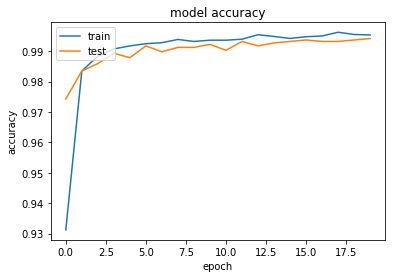

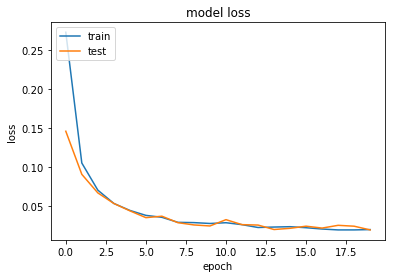

In [12]:
from keras import optimizers
from keras import regularizers

batch_size = 256
epochs = 20


model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5), kernel_initializer = 'glorot_uniform', activation='relu',input_shape=input_shape))

model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer = 'glorot_uniform', kernel_regularizer = regularizers.l2(0.01), bias_regularizer = regularizers.l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(2, activation='softmax'))
#adam = optimizers.nadam(lr = 0.2)
model.compile(loss=keras.losses.categorical_crossentropy,
               
              optimizer = 'adam',
              metrics=['accuracy'])


print(model.summary())

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])  

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can actually see some nice results here as we have improved the validation accuracy of our model to a great extent and also have the loss of our training and validation data nearly equal which shows we are on a good track. The training and validation accuracy also dont have a big difference between them which shows us that we are not overfitting or underfitting the data. Tuning more parameters can help us achieve better performance.